In [0]:
import numpy as np        #Numpy provides fast mathematical function processing
import matplotlib.pyplot as plt
import pandas as pd       #Pandas is used for easy indexing and data collection tools
import seaborn as sns     #import library to create a heatmap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.svm import LinearSVC #Is used to fit to the data you provide, returning a "best fit" for regression/classification


In [0]:
student_scores = pd.read_csv("https://raw.githubusercontent.com/TERRENCE2019/DATASETS/master/student_scores.csv")
student_scores.shape 

(25, 2)

In [0]:
student_scores.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [0]:
# Mean tells us the average of the values in each column
# Standard Deviation is the disparity between the each number and the mean
# A low standard deviation means that most of the numbers are close to the average (mean)
# A high standard deviation means that the numbers are more spread out
student_scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


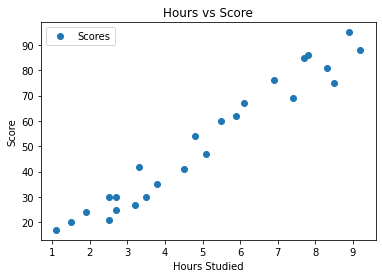

In [0]:
# Let's create a simple scatter plot to see if a linear relationship exists before we do Machine Learning
# This helps us phyiscally see the standard deviation from the overall linear slope or trend
student_scores.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [1]:
# Now we divide the data into "Attributes" and "Labels"
# Attributes are the independent variables (x axis)
# Labels are the dependent variables whose values are to be predicted (y axis)
# Now we want to predict the percentage score depending on the hours studied
# iloc gets rows (or columns) at particular positions in the index
# row selector and column selector
# Even though we only have 2 columns this comes in handy with data with multiple columns
x = student_scores.iloc[:,0:-1].values  # We want all the rows ":" and all the columns, "-1" stands for to the end, ":"
y = student_scores.iloc[:, 1].values    # We want all the rows ":" and just the second column as our (y axis = dependent variable = scores)

NameError: ignored

In [0]:
# Split the dataset into the training set and test set
# We're splitting the data for training and testing
# 75% of it wil be for training and 25% will be for testing for accuracy
# xtrain: this will be your training group
# xtest:  this will be your test model
# ytrain: this will be your target for your training group
# ytest:  as you can imagine, this will be your target for your test group

# Use-Case Overfitting vs. underfitting?: Hiring at grocery store vs. only People graduated from Haward and living nearby (underfitting) 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=0, shuffle=True)  #random_state=0 sets the seed for the random generator, shuffle=True allows to replicate the results in the same way every time, gives higher accuracy, False keeps the numbers in order
# shuffle rearrangement of elments in an ordered list / shuffle=true keeps unordered / false keeps them ordered

In [0]:
# These codes train our algorithm for Linear Regression and Machine Learning
reg = LinearRegression()
reg.fit(xtrain, ytrain)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# We want to see the intercept
# My intercept may be different because I have a different training size
print(reg.intercept_)

1.9322042531516601


In [0]:
# That one more hour of study can increase chances of a higher score by 9.91%
# My coeficients maybe different because I have different training sizes
print(reg.coef_) #number relative to what the dataset is

[9.94167834]


In [0]:
# We will use our test data and see how accurately our algorithm predicts the percentage score
# to make predictions on the test data
yprediction = reg.predict(xtest)

In [0]:
# This shows us the actual value of the test scores compared to the predicted values
# Not too bad but could use tome thighetning up
student_scores2 = pd.DataFrame({'Actual': ytest, 'Predicted': yprediction})

In [0]:
from sklearn import metrics
#The Root Mean Squared is 4.5, which is less than 10% of the mean value of the percentages of all the students (51.48)
#This means that our algorithm did a okay job
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, yprediction))  # the absolute value of the errors
print('Mean Squared Error:', metrics.mean_squared_error(ytest, yprediction))    # mean squared error (MSE) is the mean of the squared errors
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, yprediction)))  #square root of the mean of the squared errors

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805


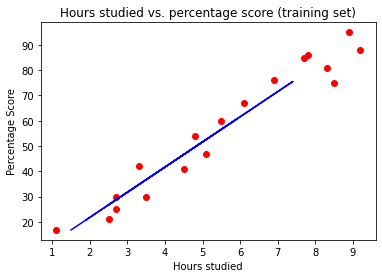

In [0]:
#Test Set
plt.scatter(xtrain, ytrain, color='red')
plt.plot(xtest, reg.predict(xtest) , color='blue')
plt.title('Hours studied vs. percentage score (training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

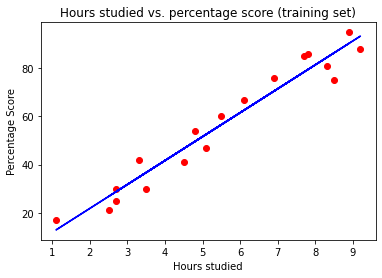

In [0]:
#Training Set
#Cross-validation manual: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
plt.scatter(xtrain, ytrain, color='red')
plt.plot(xtrain, reg.predict(xtrain), color='blue')
plt.title('Hours studied vs. percentage score (training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()